<a href="https://colab.research.google.com/github/DavidVollendroff/DS-Unit-2-Kaggle-Challenge/blob/master/module1/LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
# If you're working locally:
else:
    DATA_PATH = '../data/'

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [0]:
# Pandas Profiling can be very slow with medium & large datasets.
# These parameters will make it faster.
# https://github.com/pandas-profiling/pandas-profiling/issues/222

import pandas_profiling

profile_report = train.profile_report(
    check_correlation_pearson=False,
    correlations={
        'pearson': False,
        'spearman': False,
        'kendall': False,
        'phi_k': False,
        'cramers': False,
        'recoded': False,
    },
    plot={'histogram': {'bayesian_blocks_bins': False}},
)

# profile_report commented out. don't want to wait during restart + run all

## Assignment
- [X] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition.


In [0]:
# Will need to define a function to replace erroneous values with NaN values

import numpy as np # 

def data_cleaner(X):
  X = X.copy()
  X['latitude'] = X['latitude'].replace(-2e-08, 0) # remove non-sense values
  
  # useless columns
  X.drop(columns=['id', 'recorded_by', 'num_private', 'quantity_group'])
  
  # Will leave as a stretch goal zero-wrangling of greater complexity than this
  cols_with_zeros = ['longitude', 'latitude']
  for col in cols_with_zeros:
      X[col] = X[col].replace(0, np.nan)
  
  return X

train = data_cleaner(train)
test = data_cleaner(test)


- [X] Do train/validate/test split with the Tanzania Waterpumps data.


In [0]:
# Splitting training data into training and validation because I already have
# data split into train and test sets.

In [0]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'])

- [X] Begin with baselines for classification.

In [11]:
train['status_group'].value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [12]:
bline_acc = train['status_group'].value_counts(normalize=True).max()
print('{:.2f}% accuracy classifying everything as functional'.format(bline_acc*100))

54.31% accuracy classifying everything as functional


In [13]:
val['status_group'].value_counts(normalize=True)

functional                 0.543098
non functional             0.384259
functional needs repair    0.072643
Name: status_group, dtype: float64

In [14]:
bline_val_acc = val['status_group'].value_counts(normalize=True).max()
print('{:.2f}% validation baseline'.format(bline_val_acc*100))

54.31% validation baseline


- [X] Select features.

In [0]:
# Initial Feature Selection

#establish the 'label'
target = 'status_group'

# separate numeric features
numeric = train.select_dtypes(include='number').columns.tolist()

# find cardinality of categorical features and ditch some
cardinality = train.select_dtypes(exclude='number').nunique()
categorical = cardinality[cardinality < 50].index.tolist()

# make the final list of features
features = numeric + categorical

removed_features = ['id',
                   'recorded_by',
                   'num_private',
                   'quantity_group',
                   'status_group']

for item in removed_features:
  if item in features:
    features.remove(item)

In [0]:
# features matrix and target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

- [X] Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.

In [0]:
# import all necessary functions for sklearn pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [42]:
# create pipeline and evaluate first model
pipeline = make_pipeline(ce.OneHotEncoder(use_cat_names=True),
                         SimpleImputer(),
                         StandardScaler(),
                         DecisionTreeClassifier())

pipeline.fit(X_train, y_train)

76.04% validation accuracy


- [X] Get your validation accuracy score.

In [0]:
val_acc = pipeline.score(X_val, y_val)
print('{:.2f}% validation accuracy'.format(val_acc*100))

- [X] Get and plot your feature importances.

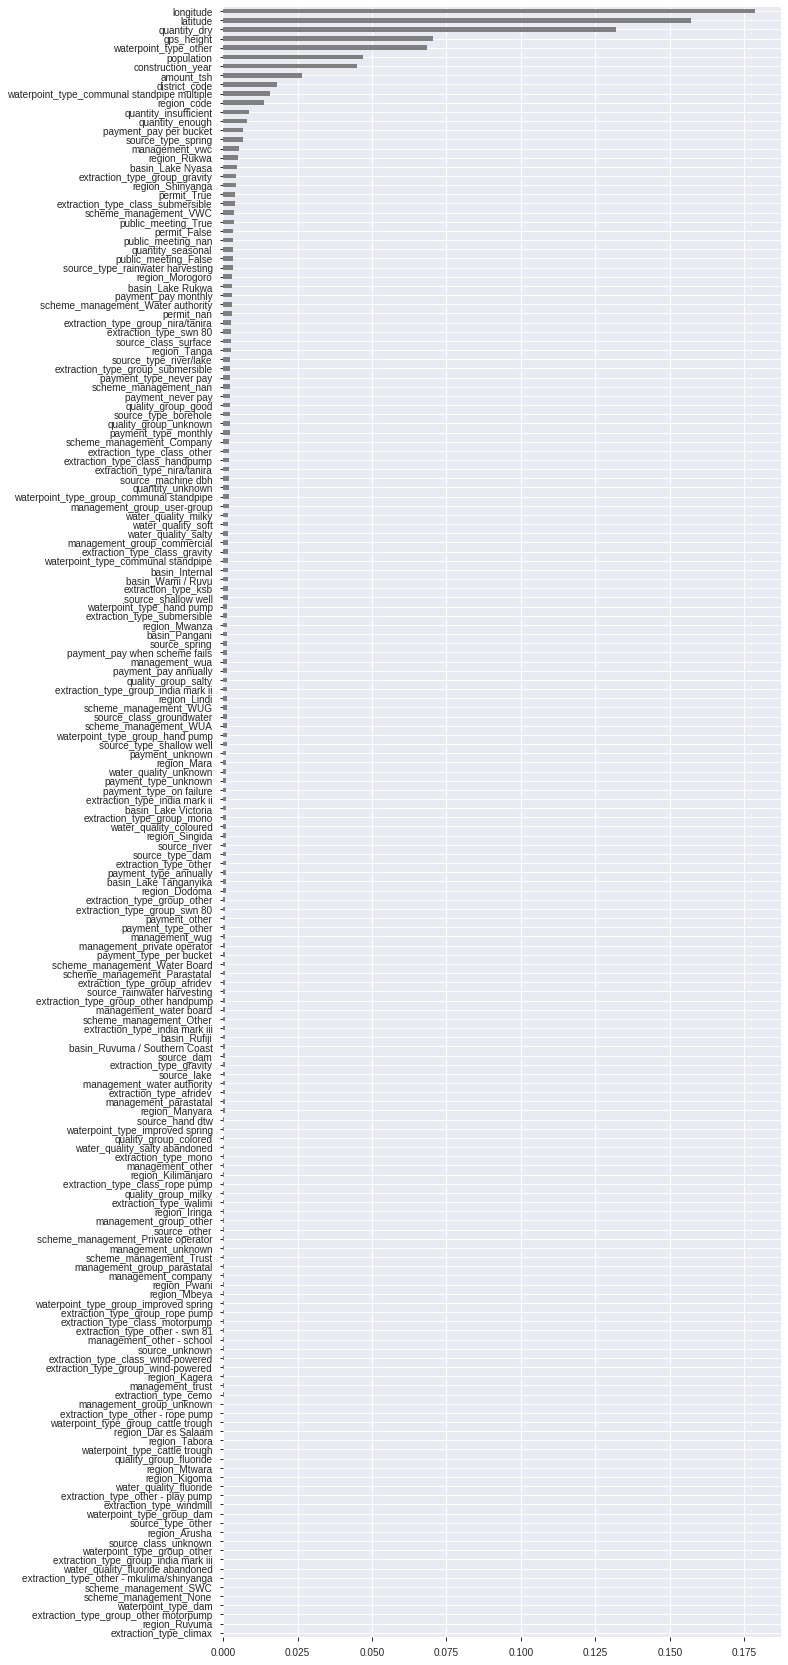

In [46]:
model = pipeline.named_steps['decisiontreeclassifier']

# with an encoder I need to access the coefficients of the adjusted matrix
encoder = pipeline.named_steps['onehotencoder'] # access to pipeline
encoded_columns = encoder.transform(X_val).columns # adjusted matrix columns

# feature importance values extracted from model
importances = pd.Series(model.feature_importances_, encoded_columns)

# plotting
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='grey');

- [X] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)

In [0]:
my_predictions = pipeline.predict(X_test)
sample_submission['status_group'] = my_predictions
sample_submission.to_csv('davidvollendroff_submission.csv', index=False)

In [0]:
sample_submission.to_csv('davidvollendroff_submission.csv', index=False)
from google.colab import files
files.download('davidvollendroff_submission.csv')

- [X] Commit your notebook to your fork of the GitHub repo.